In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("/content/crop_production.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
# Droping Nan Values
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


## Data Visualisation

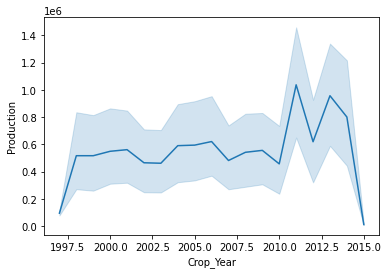

In [7]:
sns.lineplot(x = data["Crop_Year"], y = data["Production"])
plt.show()

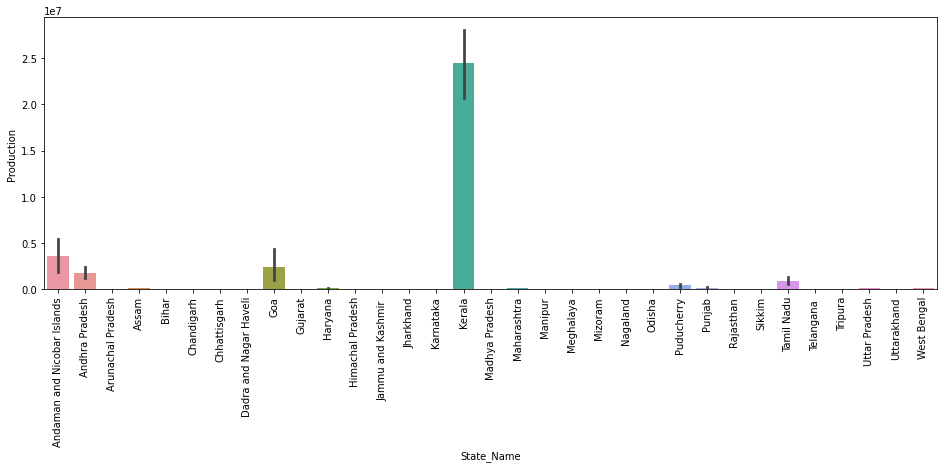

In [8]:
plt.figure(figsize=(16,5))
sns.barplot(x =data["State_Name"], y = data["Production"])
plt.xticks(rotation=90)
plt.show()

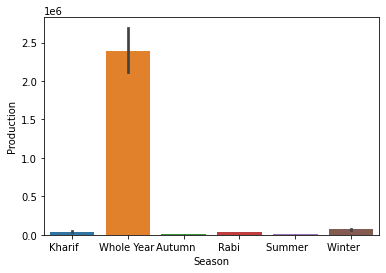

In [20]:
sns.barplot(x = data["Season"], y = data["Production"])
plt.show()

In [11]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [13]:
data["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [14]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


### Rice

In [15]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84


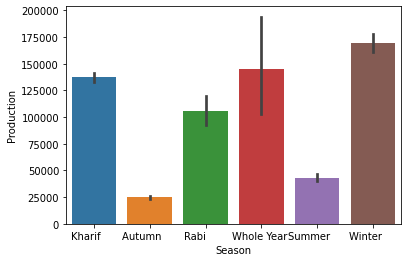

In [19]:
sns.barplot(x = "Season", y = "Production",data=rice_df)
plt.show()

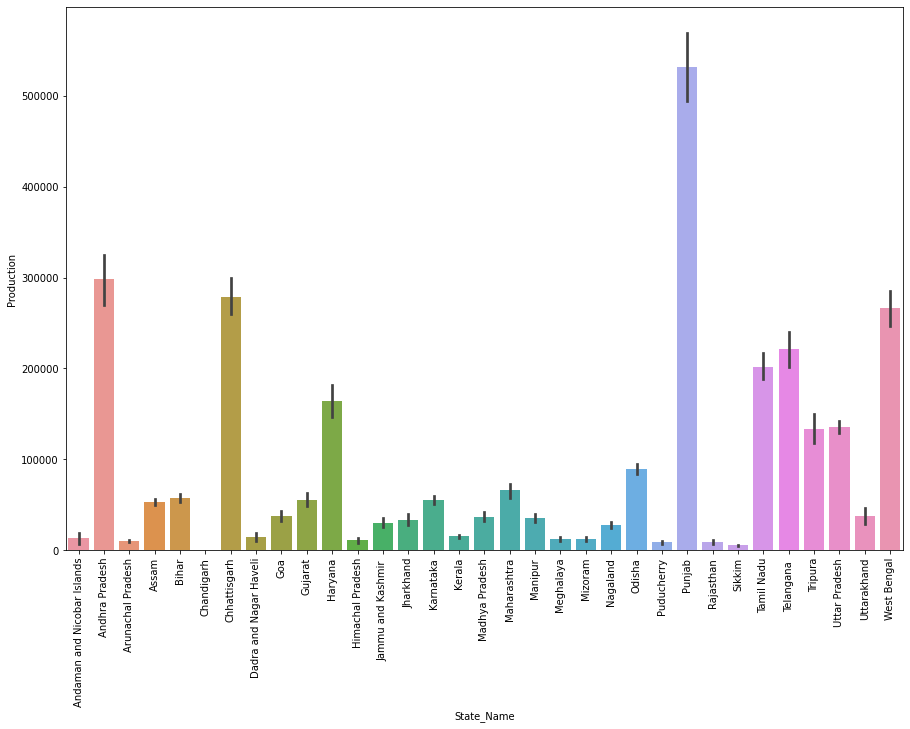

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x = "State_Name", y = "Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

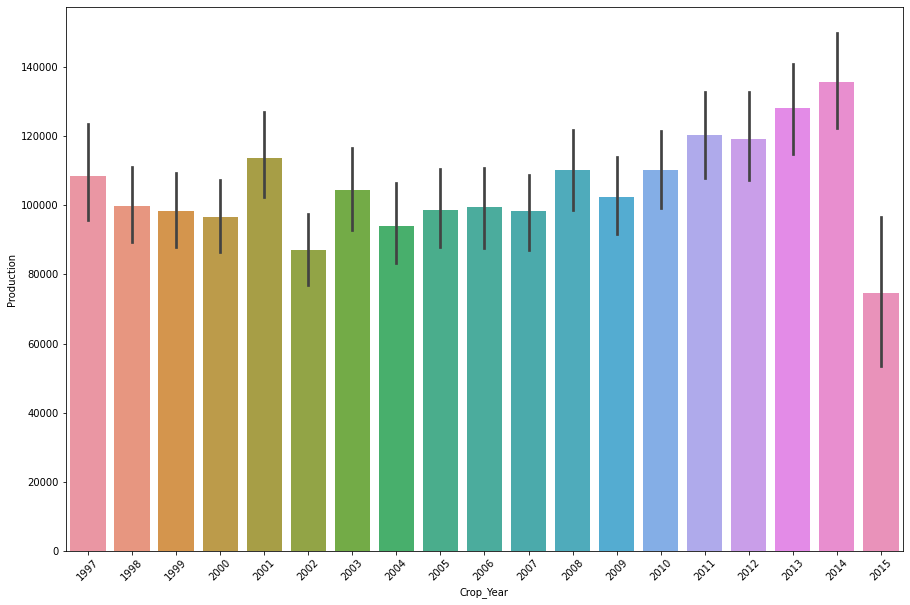

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x= "Crop_Year", y = "Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


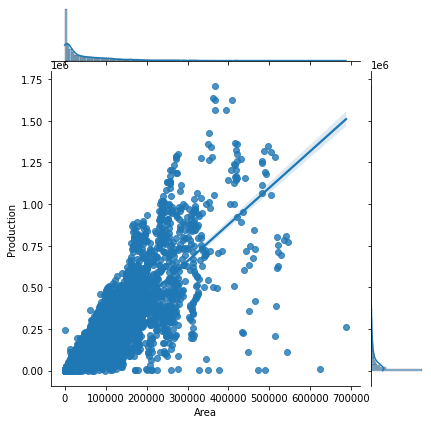

In [26]:
sns.jointplot("Area","Production",data=rice_df,kind="reg")
plt.show()

### Coconut

In [27]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


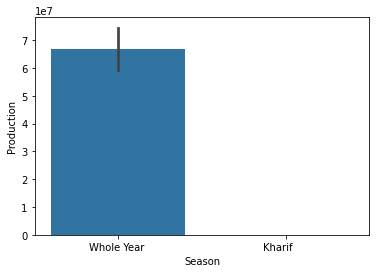

In [28]:
sns.barplot("Season","Production",data=coc_df)


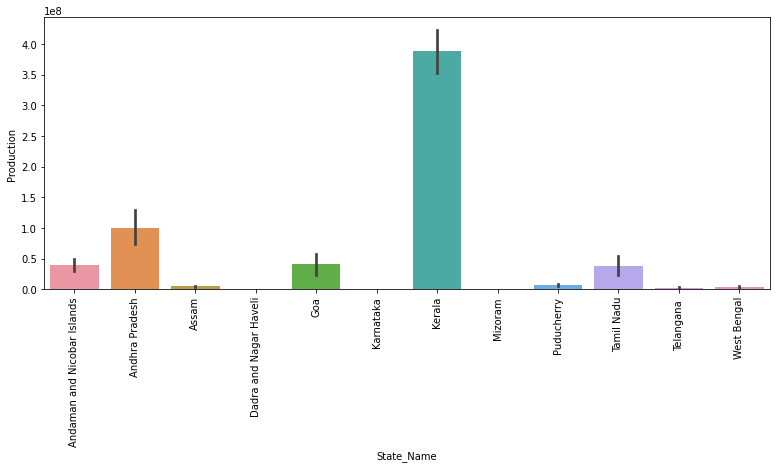

In [31]:
plt.figure(figsize=(13,5))
sns.barplot(x = "State_Name", y = "Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()


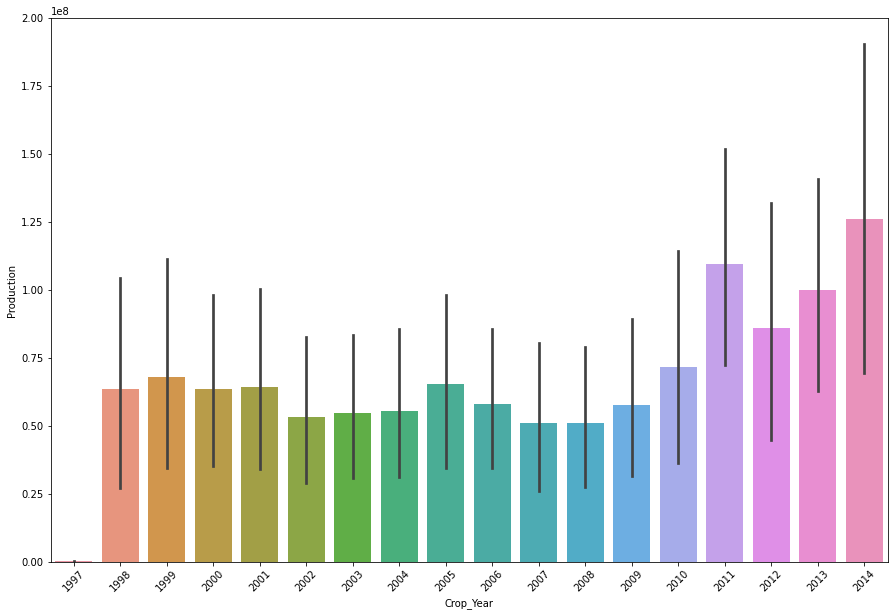

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x = "Crop_Year", y = "Production",data=coc_df)
plt.xticks(rotation=45)
plt.show()

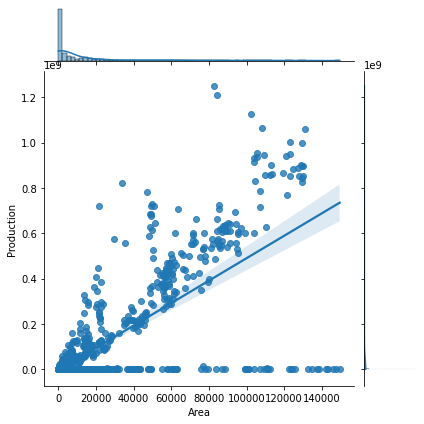

In [34]:
sns.jointplot(x = "Area", y = "Production",data=coc_df,kind="reg")


### Sugarcane

In [37]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0


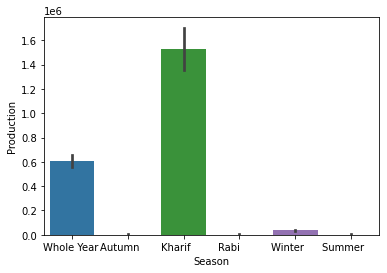

In [41]:
sns.barplot(x = "Season", y = "Production",data=sug_df)
plt.show()

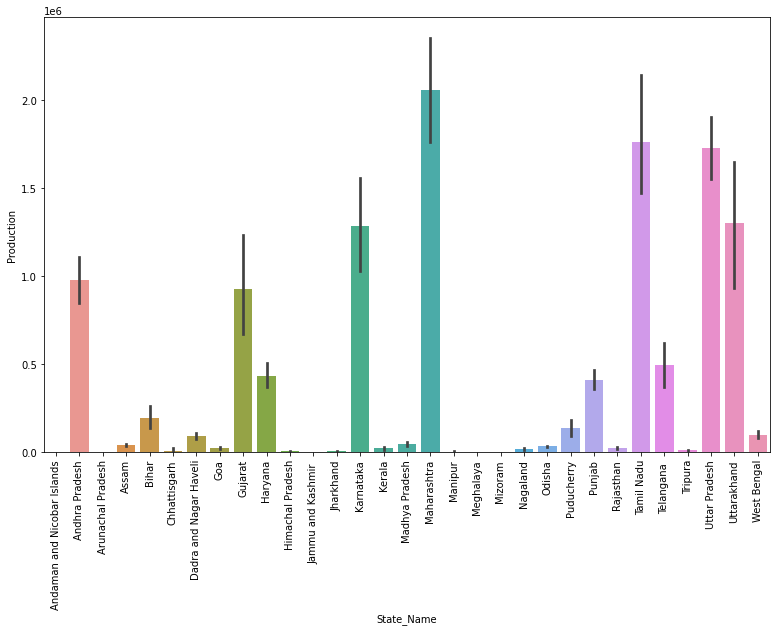

In [43]:
plt.figure(figsize=(13,8))
sns.barplot(x = "State_Name",y = "Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

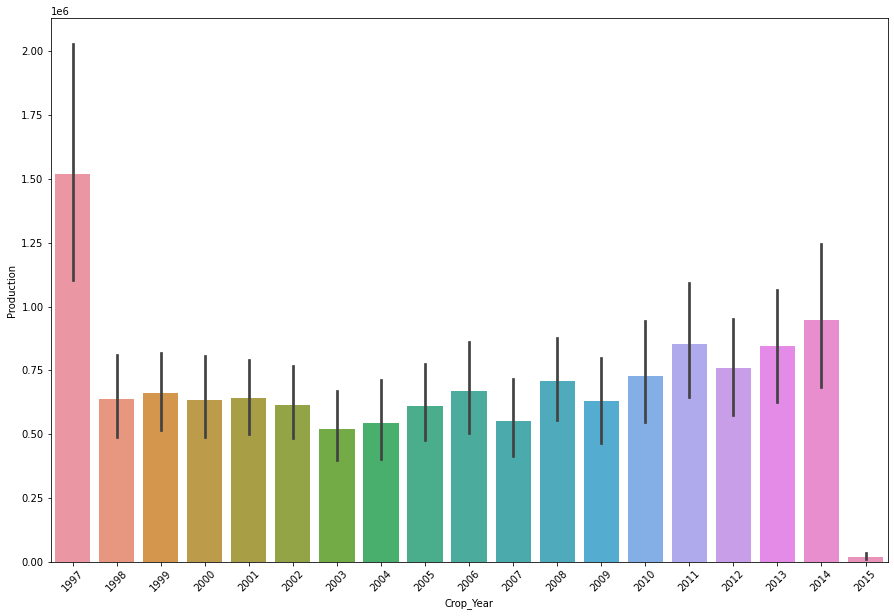

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x = "Crop_Year", y = "Production",data=sug_df)
plt.xticks(rotation=45)
plt.show()

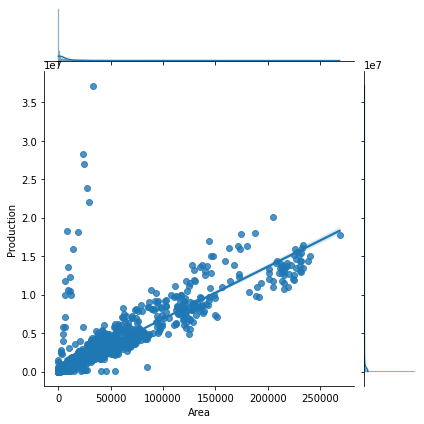

In [47]:
sns.jointplot(x = "Area", y ="Production",data=sug_df,kind="reg")
plt.show()